In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option("display.max_columns",None)

In [2]:
df=pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
df.shape

(10683, 11)

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
# Handling date column
df["day"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day
df["month"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.month
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [7]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [8]:
df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minutes']=pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_Hour,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [9]:
df['Dep_Month']=df['month']
df['Dep_day']=df['day']
df.drop(['month','day'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minutes,Dep_Month,Dep_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,50,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,25,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,18,5,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,16,50,3,1


In [10]:
df['Arr_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_Minutes']=pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [11]:
duration=list(df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]
duration_hour=[]
duration_min=[]
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0]))
    duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))



In [12]:
df['duration_hour']=duration_hour
df['duration_min']=duration_min
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minutes,Dep_Month,Dep_day,Arr_Hour,Arr_Minutes,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,3,24,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,5,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,25,6,9,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,5,5,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,50,3,1,21,35,4,45


In [13]:
df.drop(['Duration'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minutes,Dep_Month,Dep_day,Arr_Hour,Arr_Minutes,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,3,24,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,5,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,6,9,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,5,5,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,3,1,21,35,4,45


In [14]:
#Handling category data
cat_feat=[i for i in df.columns if df[i].dtype=='O']
cat_feat

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [15]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [16]:
for i in cat_feat:
    temp=df.groupby(i)["Price"].count()/len(df)
    temp_df=temp[temp<0.01].index
    df[i]=np.where(df[i].isin(temp_df),'Rare',df[i])
    

In [17]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minutes,Dep_Month,Dep_day,Arr_Hour,Arr_Minutes,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,3,24,1,10,2,50
1,Air India,Kolkata,Banglore,Rare,2 stops,No info,7662,5,50,5,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,Rare,2 stops,No info,13882,9,25,6,9,4,25,19,0
3,IndiGo,Kolkata,Banglore,Rare,1 stop,No info,6218,18,5,5,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,Rare,1 stop,No info,13302,16,50,3,1,21,35,4,45


In [18]:
df['Route'].value_counts()

DEL → BOM → COK          2376
Rare                     1720
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
DEL → BLR → COK           232
DEL → COK                 213
DEL → AMD → BOM → COK     205
DEL → MAA → COK           146
Name: Route, dtype: int64

In [19]:
df.drop(['Additional_Info'],axis=1,inplace=True)

In [20]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Dep_Hour,Dep_Minutes,Dep_Month,Dep_day,Arr_Hour,Arr_Minutes,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,22,20,3,24,1,10,2,50
1,Air India,Kolkata,Banglore,Rare,2 stops,7662,5,50,5,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,Rare,2 stops,13882,9,25,6,9,4,25,19,0
3,IndiGo,Kolkata,Banglore,Rare,1 stop,6218,18,5,5,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,Rare,1 stop,13302,16,50,3,1,21,35,4,45


In [21]:
df["Airline"].value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Rare                   23
Name: Airline, dtype: int64

In [22]:
Airline=df[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Rare,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [23]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [24]:
Source=df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [25]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [26]:
Destination=df[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [27]:
Route=df['Route']
Route=pd.get_dummies(Route,drop_first=True)
Route.head()

,BLR → DEL,BOM → HYD,CCU → BLR,CCU → BOM → BLR,CCU → DEL → BLR,DEL → AMD → BOM → COK,DEL → BLR → COK,DEL → BOM → COK,DEL → COK,DEL → HYD → COK,DEL → JAI → BOM → COK,DEL → MAA → COK,MAA → CCU,Rare
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
Rare          46
Name: Total_Stops, dtype: int64

In [29]:
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'Rare':4},inplace=True)

In [30]:
df.drop(['Route'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Dep_Hour,Dep_Minutes,Dep_Month,Dep_day,Arr_Hour,Arr_Minutes,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,0,3897,22,20,3,24,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,50,5,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,25,6,9,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,18,5,5,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,16,50,3,1,21,35,4,45


In [31]:
df=pd.concat([df,Airline,Source,Destination],axis=1)

In [32]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Dep_Hour,Dep_Minutes,Dep_Month,Dep_day,Arr_Hour,Arr_Minutes,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Rare,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,22,20,3,24,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,50,5,1,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,25,6,9,4,25,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,18,5,5,12,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,16,50,3,1,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [34]:
df.head()

,Total_Stops,Price,Dep_Hour,Dep_Minutes,Dep_Month,Dep_day,Arr_Hour,Arr_Minutes,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Rare,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,22,20,3,24,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,50,5,1,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,25,6,9,4,25,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,18,5,5,12,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,16,50,3,1,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
df.shape

(10682, 27)

In [36]:
Price=df["Price"]

In [37]:
df1=pd.read_excel('Test_set.xlsx')
df1=pd.concat([df1,Price],axis=1)
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,3897
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,7662
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,13882
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,6218
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,13302


In [38]:
df1.dropna(inplace=True)
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [39]:
# Handling date column
df1["day"]=pd.to_datetime(df1["Date_of_Journey"],format="%d/%m/%Y").dt.day
df1["month"]=pd.to_datetime(df1["Date_of_Journey"],format="%d/%m/%Y").dt.month
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,3897,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,7662,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,13882,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,6218,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,13302,24,6


In [40]:
df1.drop(['Date_of_Journey'],axis=1,inplace=True)
df1.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,3897,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,7662,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,13882,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,6218,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,13302,24,6


In [41]:
df1['Dep_Hour']=pd.to_datetime(df1['Dep_Time']).dt.hour
df1['Dep_Minutes']=pd.to_datetime(df1['Dep_Time']).dt.minute
df1.drop(['Dep_Time'],axis=1,inplace=True)
df1.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_Hour,Dep_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,3897,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,7662,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,13882,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,6218,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,13302,24,6,23,55


In [42]:
df1['Dep_Month']=df1['month']
df1['Dep_day']=df1['day']
df1.drop(['month','day'],axis=1,inplace=True)
df1.head()


df1['Arr_Hour']=pd.to_datetime(df1['Arrival_Time']).dt.hour
df1['Arr_Minutes']=pd.to_datetime(df1['Arrival_Time']).dt.minute
df1.drop(['Arrival_Time'],axis=1,inplace=True)


duration=list(df1["Duration"])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]
duration_hour=[]
duration_min=[]
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0]))
    duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))


df1['duration_hour']=duration_hour
df1['duration_min']=duration_min
df1.head()

df1.drop(['Duration'],axis=1,inplace=True)
df1.head()

#Handling category data
cat_feat=[i for i in df1.columns if df1[i].dtype=='O']
cat_feat

df1['Airline'].value_counts()

for i in cat_feat:
    temp=df1.groupby(i)["Price"].count()/len(df1)
    temp_df1=temp[temp<0.01].index
    df1[i]=np.where(df1[i].isin(temp_df1),'Rare',df1[i])
    
Airline=df1[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

Source=df1[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

Destination=df1[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

df1.replace({'non-stop':0,'1 stop':1,'2 stops':2,'Rare':3},inplace=True)
df1.drop(['Route'],axis=1,inplace=True)
df1=pd.concat([df1,Airline,Source,Destination],axis=1)
df1.drop(['Airline','Source','Destination'],axis=1,inplace=True)


In [43]:
df1.head()

,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minutes,Dep_Month,Dep_day,Arr_Hour,Arr_Minutes,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Rare,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,No info,3897,17,30,6,6,4,25,10,55,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,No info,7662,6,20,5,12,10,20,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,In-flight meal not included,13882,19,15,5,21,19,0,23,45,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,No info,6218,8,0,5,21,21,0,13,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,0,No info,13302,23,55,6,24,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [44]:
df1.drop(['Additional_Info'],axis=1,inplace=True)
df1.drop(['Price'],axis=1,inplace=True)
df1.shape

(2671, 26)

In [45]:
df.columns

Index(['Total_Stops', 'Price', 'Dep_Hour', 'Dep_Minutes', 'Dep_Month',
       'Dep_day', 'Arr_Hour', 'Arr_Minutes', 'duration_hour', 'duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Rare',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [46]:
df1.columns

Index(['Total_Stops', 'Dep_Hour', 'Dep_Minutes', 'Dep_Month', 'Dep_day',
       'Arr_Hour', 'Arr_Minutes', 'duration_hour', 'duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Rare',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [47]:
df.shape

(10682, 27)

In [48]:
x=df.loc[:,['Total_Stops','Dep_Hour', 'Dep_Minutes', 'Dep_Month',
       'Dep_day', 'Arr_Hour', 'Arr_Minutes', 'duration_hour', 'duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Rare',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
x.head()

,Total_Stops,Dep_Hour,Dep_Minutes,Dep_Month,Dep_day,Arr_Hour,Arr_Minutes,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Rare,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,22,20,3,24,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,5,50,5,1,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,25,6,9,4,25,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,18,5,5,12,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,16,50,3,1,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
y = df.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

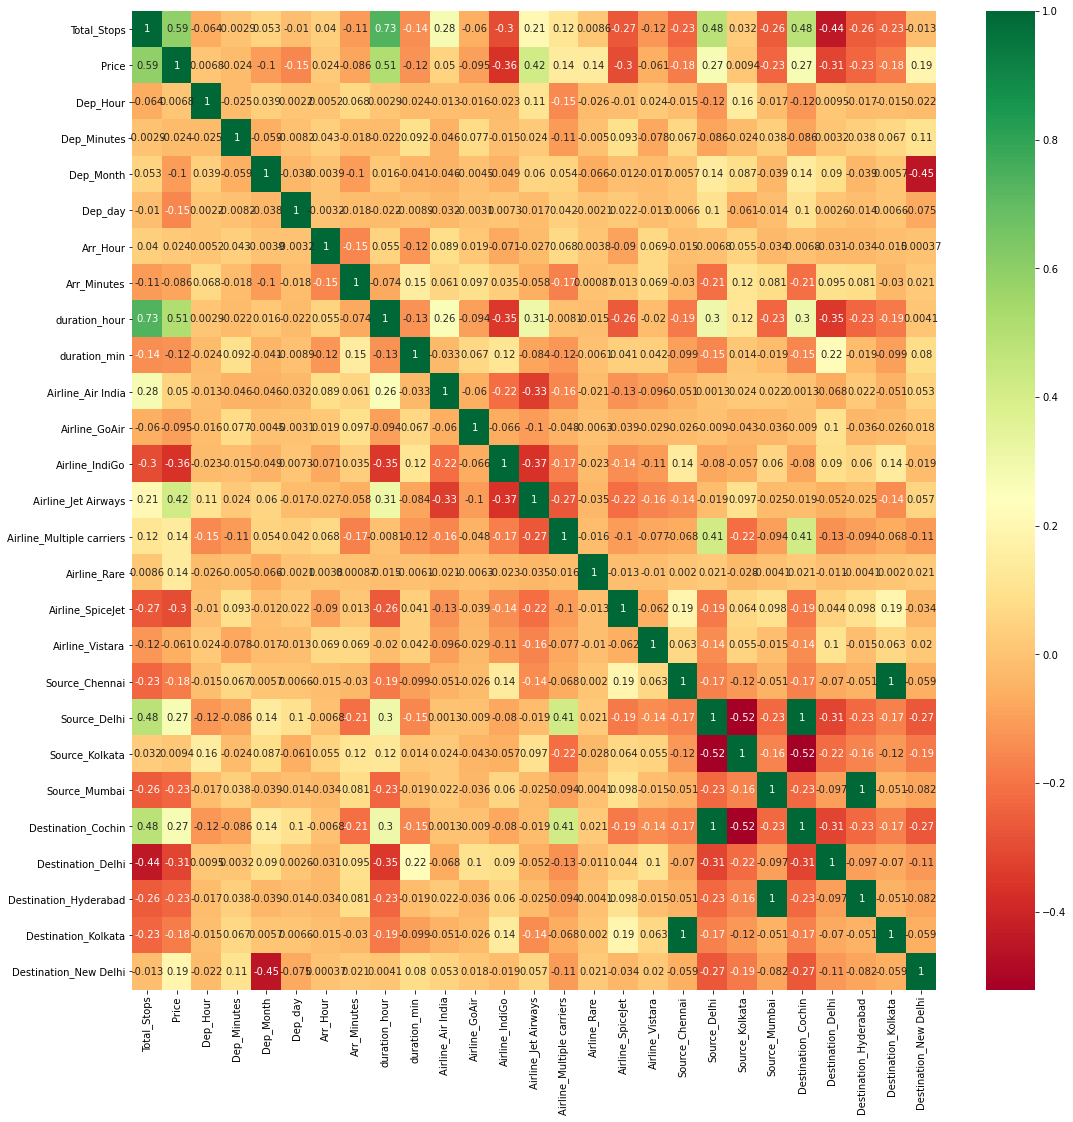

In [50]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [52]:
print(selection.feature_importances_)

[0.22499076 0.02526576 0.02367691 0.05384078 0.15268039 0.02758728
 0.01950166 0.11101028 0.01776652 0.01217736 0.00205526 0.0231698
 0.14505986 0.01661443 0.03403052 0.00334795 0.00492529 0.00052226
 0.01337651 0.00361964 0.00755013 0.01244186 0.01731216 0.0075607
 0.00057304 0.03934289]


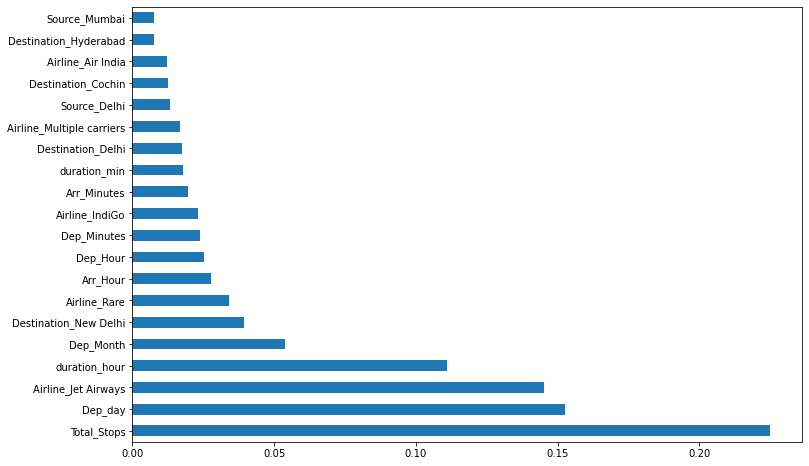

In [53]:
plt.figure(figsize = (12,8))
feat_imp=pd.Series(selection.feature_importances_,index=x.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

In [54]:
feat_imp.nlargest(26)

Total_Stops                  0.224991
Dep_day                      0.152680
Airline_Jet Airways          0.145060
duration_hour                0.111010
Dep_Month                    0.053841
Destination_New Delhi        0.039343
Airline_Rare                 0.034031
Arr_Hour                     0.027587
Dep_Hour                     0.025266
Dep_Minutes                  0.023677
Airline_IndiGo               0.023170
Arr_Minutes                  0.019502
duration_min                 0.017767
Destination_Delhi            0.017312
Airline_Multiple carriers    0.016614
Source_Delhi                 0.013377
Destination_Cochin           0.012442
Airline_Air India            0.012177
Destination_Hyderabad        0.007561
Source_Mumbai                0.007550
Airline_Vistara              0.004925
Source_Kolkata               0.003620
Airline_SpiceJet             0.003348
Airline_GoAir                0.002055
Destination_Kolkata          0.000573
Source_Chennai               0.000522
dtype: float

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [63]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=1000)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=1000)

In [64]:
y_pred = reg_rf.predict(X_test)

In [65]:
reg_rf.score(X_train, y_train)

0.889077276265444

In [66]:
reg_rf.score(X_test, y_test)

0.812539976050741

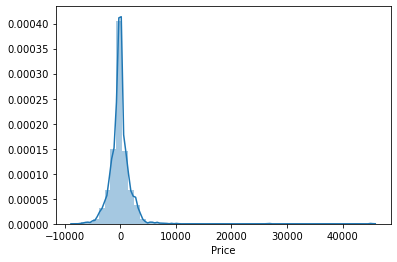

In [60]:
sns.distplot(y_test-y_pred)
plt.show()

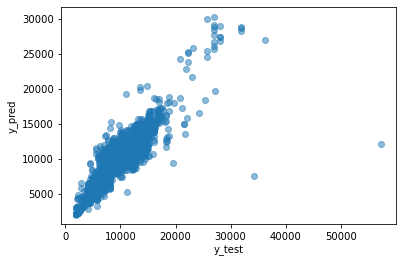

In [61]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [62]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1165.7014812451391
MSE: 4051176.9870082247
RMSE: 2012.7535832804335


In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
rf_rand=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,n_iter=10,verbose=2,n_jobs=1,scoring='neg_mean_squared_error',cv=5,random_state=42)

In [ ]:
rf_rand.fit(X_train,y_train)

In [ ]:
rf_rand.best_estimator_

In [ ]:
rf_rand.best_params_

In [ ]:
prediction=rf_rand.predict(X_test)

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
rf_rand.score(X_train, y_train)

In [ ]:
rf_rand.score(X_test,y_test)

In [ ]:
metrics.r2_score(y_test,prediction)